# Projeto 3 de Ciência dos Dados

## Grupo:
    Lucas Hix
    Andrea Tessler
    Celso Diniz

# Objetivos:

* Analise do preço por genero ok
* Analise do ganho(preço * donos) por sua avaliação
* Analise do tempo médio passando dentro do jogo por sua avaliação
* Analise das avaliações por genero ok
* Analise de media de minutos dentro do jogo por tipo de categoria ok

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [148]:
data = pd.read_csv('steam.csv')
data.head(1)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19


In [149]:
data['rating'] = data['positive_ratings'] - data['negative_ratings']

In [150]:
new_owners = []

for x in data['owners']:
    new_owners.append(int(x.split('-')[0]))
    
data['profit'] = new_owners * data['price']
data.head(1)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,rating,profit
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19,121195,71900000.0


In [151]:
result = []

for x in data['genres']:
    result.extend(x.split(";"))
result = set(result)
generos = []
generos.extend(result)

In [152]:
result = []
for x in generos:
    subtabela = data[data['genres'].str.contains(x)]
    result.append(subtabela["price"].mean())
print(result)

[11.253448275862072, 5.049866639204594, 26.788823529411776, 6.140368814584433, 14.392671232876715, 4.320110650069142, 6.228351126927571, 0.09916666666666663, 39.69607142857143, 7.2089834424338335, 3.98, 7.8779349470499085, 27.726962025316446, 5.972104283053982, 7.039631008801699, 7.285977443609022, 6.942147993505151, 6.846612244897962, 26.817241379310317, 6.9445607013534305, 31.80225806451613, 6.121800239234548, 7.050117187499913, 4.1061949069541726, 3.98, 2.91, 61.68, 11.322368421052635, 14.64333333333333]


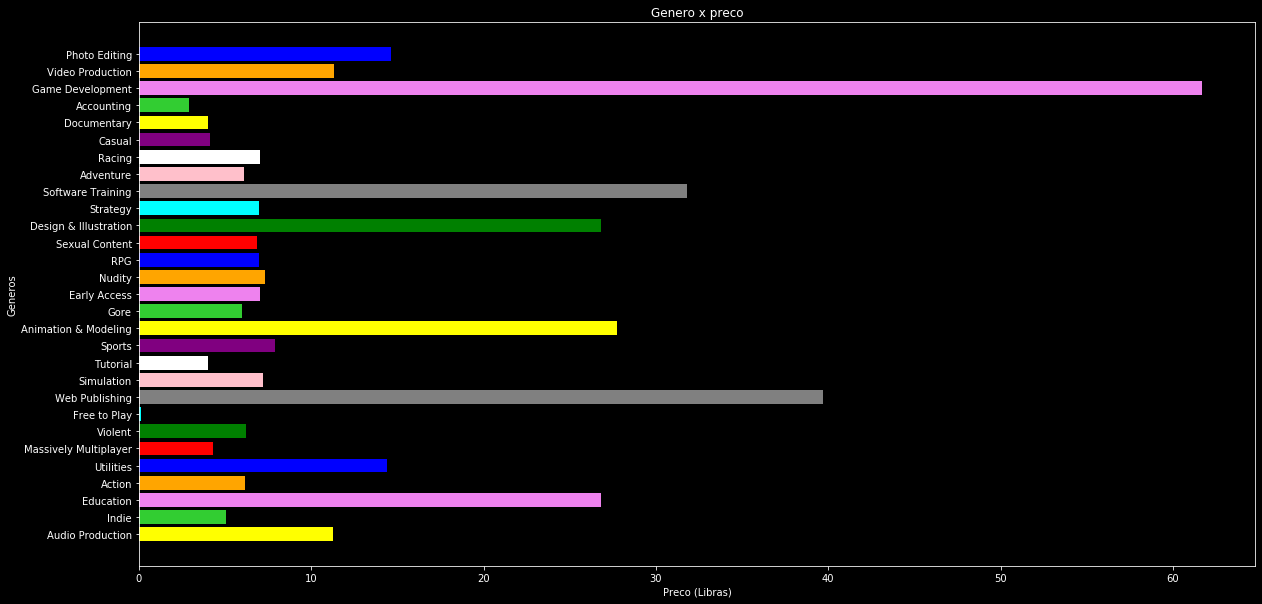

In [153]:
plt.style.use('dark_background')
plt.barh(generos, result, color = ('yellow', 'limegreen', 'violet', 'orange', 'blue', 'red', 'green','cyan','gray', 'pink','white', 'purple'))
plt.rcParams['figure.figsize'] = (20,10)
plt.title('Genero x preco')
plt.xlabel('Preco (Libras)') # em libras
plt.ylabel('Generos')
#plt.grid(True)
plt.show()

In [154]:
result = []
for x in data['categories']:
    result.extend(x.split(";"))
result = set(result)
categorias = []
categorias.extend(result)
print(categorias)

['Co-op', 'SteamVR Collectibles', 'Commentary available', 'Online Multi-Player', 'Steam Turn Notifications', 'In-App Purchases', 'Steam Achievements', 'MMO', 'Local Co-op', 'Online Co-op', 'Mods', 'Includes Source SDK', 'Full controller support', 'Steam Workshop', 'VR Support', 'Steam Trading Cards', 'Mods (require HL2)', 'Multi-player', 'Partial Controller Support', 'Steam Cloud', 'Valve Anti-Cheat enabled', 'Single-player', 'Captions available', 'Stats', 'Steam Leaderboards', 'Includes level editor', 'Local Multi-Player', 'Shared/Split Screen', 'Cross-Platform Multiplayer']


In [155]:
result = []
for x in categorias:
    subtabela = data[data['categories'].str.contains(x)]
    result.append(subtabela["average_playtime"].mean())
print(result)

[359.7642089093702, 656.95, 434.34722222222223, 295.8564535585042, 88.0952380952381, 575.6492753623188, 165.3459306440198, 1028.7814726840854, 89.7610953729934, 393.95891690009336, 532.5, 896.1142857142858, 145.72361720807726, 630.9520624303233, 308.2597402597403, 275.6592573882294, nan, 371.2931555108203, 187.27231931979216, 195.9634298379277, 2094.68085106383, 132.82989329387024, 395.22052704576976, 232.48615548455805, 166.54027333527188, 359.753861003861, 122.07616099071207, 114.52369888475836, 536.4477335800185]


/Users/celso/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


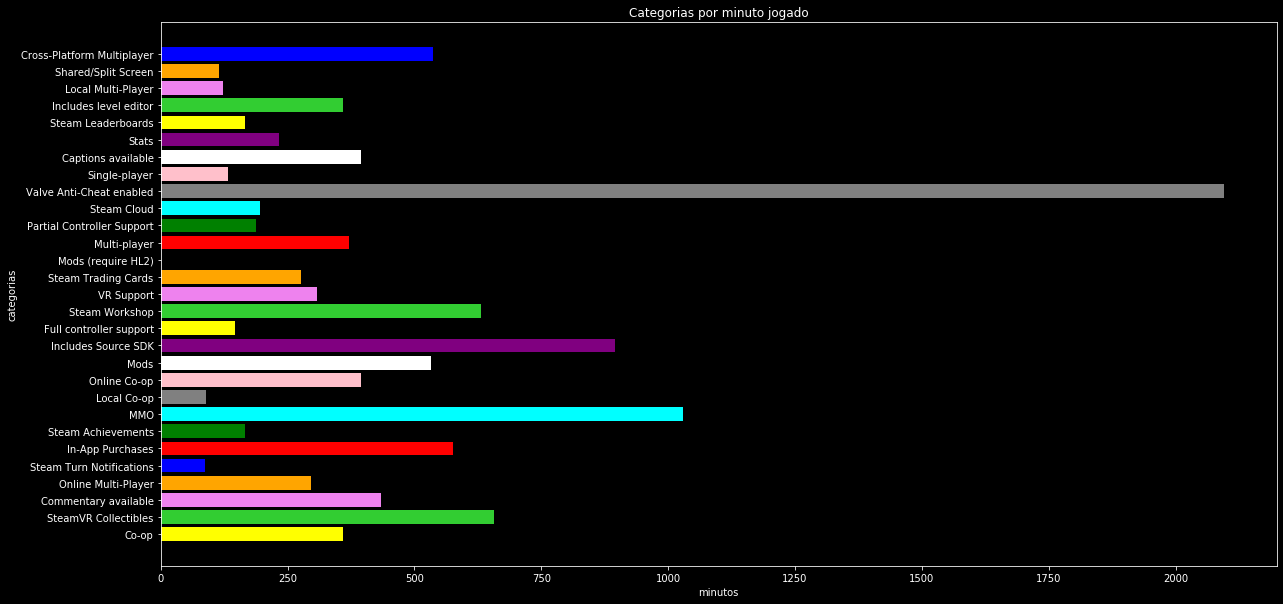

In [156]:
plt.barh(categorias, result, color = ('yellow', 'limegreen', 'violet', 'orange', 'blue', 'red', 'green','cyan','gray', 'pink','white', 'purple'))
plt.xlabel('minutos')
plt.ylabel('categorias')
plt.title('Categorias por minuto jogado');

In [157]:
result = []
for x in generos:
    subtabela = data[data['genres'].str.contains(x)]
    result.append(subtabela["rating"].mean())
print(result)

[31.862068965517242, 448.79856855980637, 48.35294117647059, 1225.1689490044528, 526.0616438356165, 1584.0235131396958, 173.36654804270464, 3445.81103286385, 288.14285714285717, 653.1420870234887, 0.0, 383.3343419062027, 1054.7848101265822, 200.1024208566108, 266.3500338524035, 610.1691729323309, 1068.1902110879146, 429.2122448979592, 828.551724137931, 683.779493043644, 61.935483870967744, 636.6733452950558, 525.2490234375, 225.1794319294809, 0.0, 2.3333333333333335, 64.70588235294117, 474.3157894736842, 53.083333333333336]


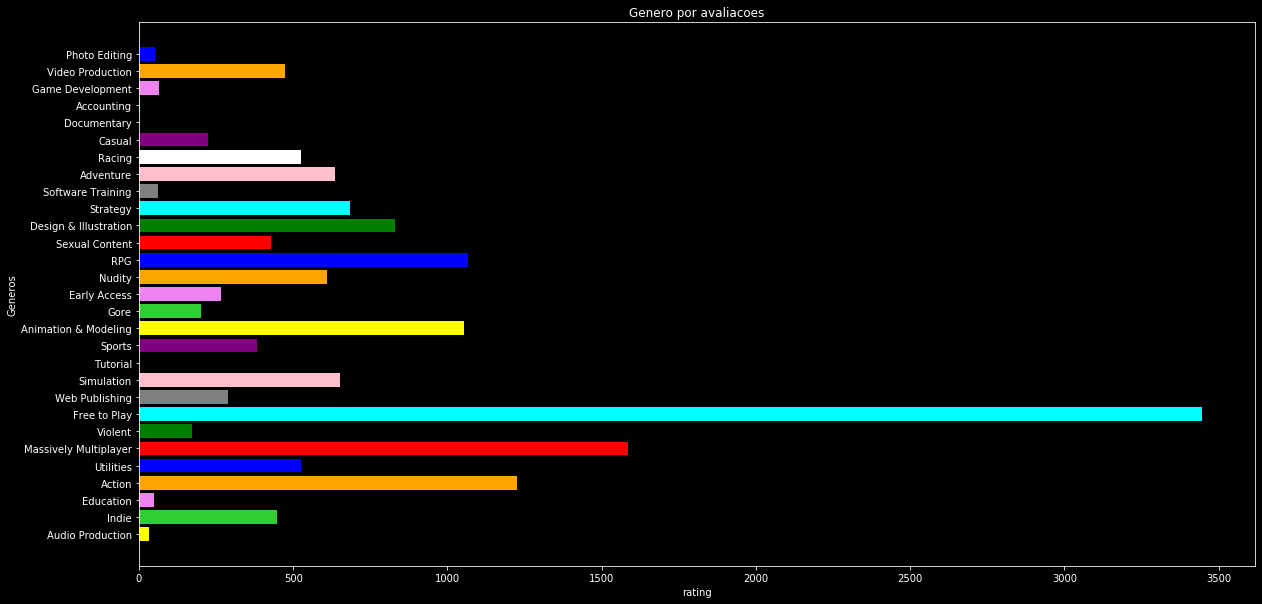

In [158]:
plt.barh(generos, result, color = ('yellow', 'limegreen', 'violet', 'orange', 'blue', 'red', 'green','cyan','gray', 'pink','white', 'purple'))
plt.xlabel('rating')
plt.ylabel('Generos')
plt.title('Genero por avaliacoes');